In [1]:
import os
import csv
import matplotlib.pyplot as plt

In [2]:
fpath = './comma/ours_savp/'
folder = []
for p in os.listdir(fpath):
    if os.path.isdir(fpath+p):
        folder.append(fpath+p+'/metrics/')
print(folder)

['./comma/ours_savp/prediction_eval_psnr_min/metrics/', './comma/ours_savp/prediction_eval_vgg_csim_min/metrics/', './comma/ours_savp/prediction_eval_ssim_max/metrics/', './comma/ours_savp/prediction_eval_ssim_finn_min/metrics/', './comma/ours_savp/prediction_eval_ssim_scikit_max/metrics/', './comma/ours_savp/prediction_eval_psnr_max/metrics/', './comma/ours_savp/prediction_eval_vgg_csim_max/metrics/', './comma/ours_savp/prediction_eval_ssim_scikit_min/metrics/', './comma/ours_savp/prediction_eval_ssim_min/metrics/', './comma/ours_savp/prediction_eval_ssim_finn_max/metrics/']


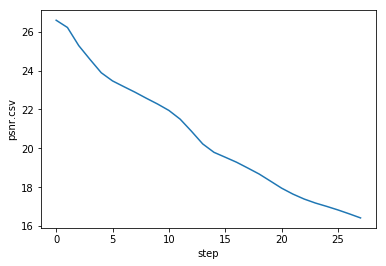

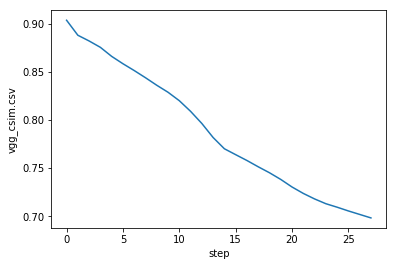

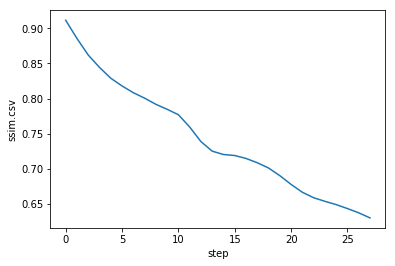

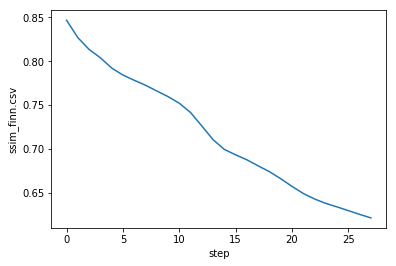

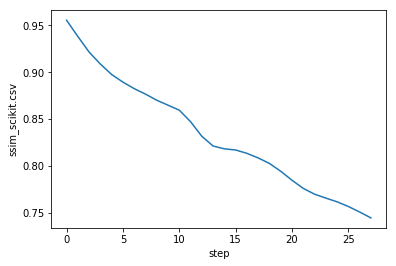

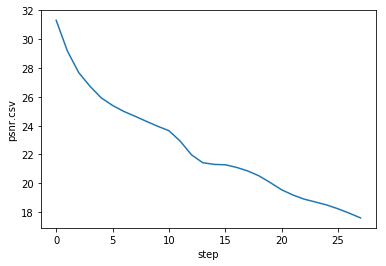

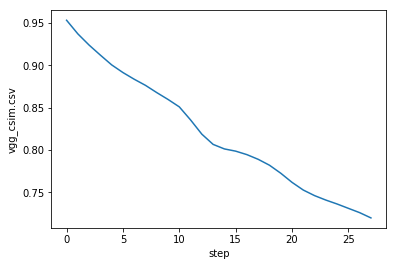

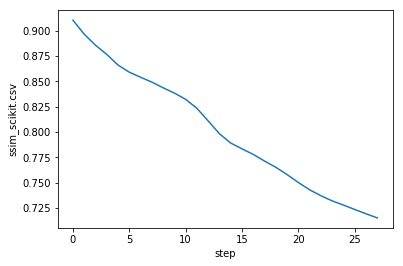

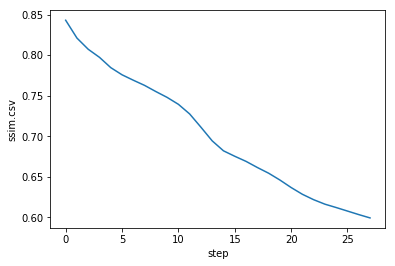

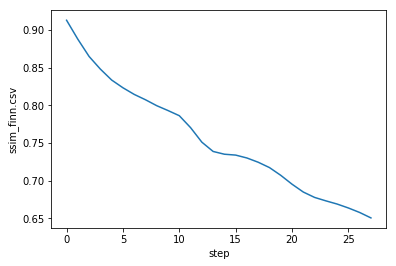

In [11]:
for f in folder:
    for file in os.listdir(f):
        csvfile = open(f+file,'r',encoding='utf-8')
        reader = [each for each in csv.DictReader(csvfile, delimiter='\t')]
        count = 0
        for row in reader:
            if count==0:
                mean = [0]*(len(row)-2)
            for k in row:
                #print(k)
                if k!='sample_ind' and k!='mean':
                    mean[int(k)] = mean[int(k)] + float(row[k])
            count=count+1

        for i in range(len(mean)):
            mean[i] = mean[i] / count

        plt.figure()
        plt.plot(mean)
        plt.xlabel("step")
        plt.ylabel(file)
        

Text(0,0.5,'psnr')

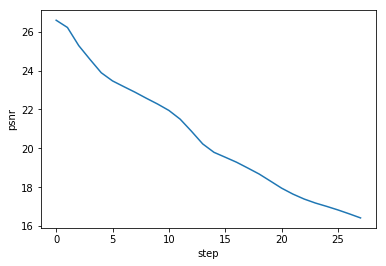

In [10]:
#csv_reader = csv.reader(open(folder[0]+'psnr.csv',encoding='utf-8'))
csvfile = open(folder[0]+'psnr.csv','r',encoding='utf-8')
reader = [each for each in csv.DictReader(csvfile, delimiter='\t')]
count = 0
for row in reader:
    if count==0:
        mean = [0]*(len(row)-2)
    for k in row:
        #print(k)
        if k!='sample_ind' and k!='mean':
            mean[int(k)] = mean[int(k)] + float(row[k])
    count=count+1

for i in range(len(mean)):
    mean[i] = mean[i] / count
    
plt.figure()
plt.plot(mean)
plt.xlabel("step")
plt.ylabel("psnr")